# Lecture 8
# The Neural Network Model

*Readings:* Chapter 6

<img src="https://github.com/ch00226855/temp/blob/main/.ipynb_checkpoints/LearningProcess.png?raw=true" height="500">

In [1]:
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [3]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

t_u.shape

torch.Size([11, 1])

In [5]:
from sklearn.model_selection import train_test_split

t_un = 0.1 * t_u # normalization
t_un_train, t_un_val, t_c_train, t_c_val = train_test_split(t_un, t_c, test_size=0.2)

# Why does this not work?
# t_un_train, t_un_val = train_test_split(t_un, test_size=0.2)
# t_c_train, t_c_val = train_test_split(t_c, test_size=0.2)

print(t_un_train.view(-1))
print(t_c_train.view(-1))

tensor([6.0400, 5.5900, 5.8200, 3.5700, 8.1900, 5.6300, 4.8900, 3.3900])
tensor([13.0000, 14.0000, 15.0000,  0.5000, 28.0000, 11.0000,  8.0000,
         3.0000])


## Artificial Neurons

The basic building block of neural netowrks is the **artificial neuron**.
- At its core, the artificial neuron nothing but:
    - the application of a linear transformation of the input, and
    - the application of a non-linear function (called the **activation function**)
- Mathematically, we can express the artificial neuron as
$$
output = \sigma(w\cdot input + b)
$$
- w is called the **weight matrix**
- b is called the **biase vector**
- $\sigma$ is a non-linear function.

<img src="https://github.com/ch00226855/temp/blob/main/.ipynb_checkpoints/Neuron.png?raw=true" height="500">

Popular choices of activation functions are:
- The logistic function $\sigma(t) = \frac{1}{1 + e^{-t}}$
- The hyperbolic tangent $tanh(t) = \frac{e^t - e^{-t}}{e^t + e^{-t}}$
- The rectified linear unit (ReLU) $ReLU(t) = \max{(0, t)}$

<img src="https://github.com/ch00226855/temp/blob/main/.ipynb_checkpoints/ActivationFunction.png?raw=true" height="500">

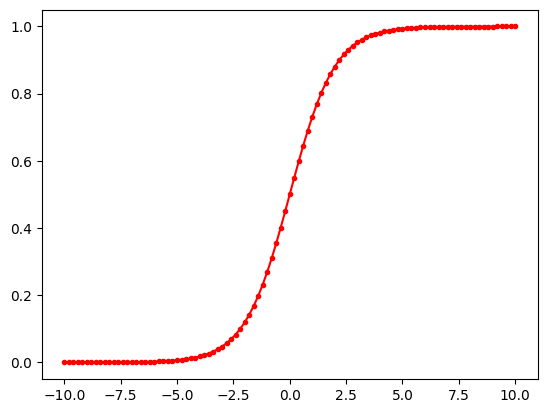

In [8]:
# Plot the graph of the logistic function.
import matplotlib.pyplot as plt
coordX = np.linspace(-10, 10, 101)
coordY = 1 / (1 + np.exp(-coordX))
# print(coordX)
# print(coordY)
plt.plot(coordX, coordY, 'r.-')

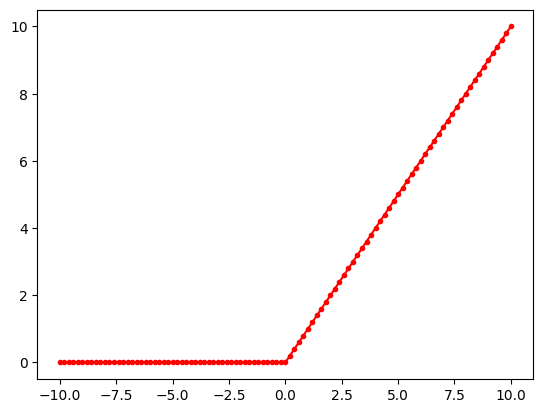

In [ ]:
# Plot the graph of the ReLu function.
coordX = np.linspace(-10, 10, 101)
coordY = np.maximum(0, coordX)
plt.plot(coordX, coordY, 'r.-')

## Composing a Multi-Layer Network

A multi-layer neural network is made up of a composition of functions discussed in the previous section:
- `x_1 = layer1(x_0)`
- `x_2 = layer2(x_1)`
- ...
- `y = layer_last(x_last)`

Each layer i has its own weight matrix `w_i` and bias vector `b_i`. These parameters determines the behavior of the neural network together.

<img src="https://github.com/ch00226855/temp/blob/main/.ipynb_checkpoints/NeuralNetwork.png?raw=true" height="500">

In [ ]:
# Let's build a neural network with 3 layers.
def relu(t):
    return torch.relu(t)

In [ ]:
# layer
def layer(x, w, b):
    #  return relu(x @ w + b) # @ represents vector inner product
    return relu(torch.matmul(x, w) + b)

In [ ]:
# Network
def net(x, w1, w2, w3, b1, b2, b3):
    x1 = layer(x, w1, b1)
    x2 = layer(x1, w2, b2)
    x3 = layer(x2, w3, b3)
    return x3

In [ ]:
# Feed t_un_train to the network and get predictions
w1 = torch.zeros([1, 5], requires_grad=True) # 1 means 1 input feature, 5 means 5 neurons.
b1 = torch.zeros([1, 5], requires_grad=True)
# x1 = layer1(t_un_train, w1, b1)

w2 = torch.zeros([5, 5], requires_grad=True) # first 5 comes from the 5 inputs,
                        #  second 5 comes from the size of this layer
b2 = torch.zeros([1, 5], requires_grad=True)
# x2 = layer2(x1, w2, b2)
# print(x2)

w3 = torch.zeros([5, 1], requires_grad=True)
b3 = torch.zeros([1, 1], requires_grad=True)
# x3 = layer3(x2, w3, b3)
# print(x3)

prediction = net(t_un_train, w1, w2, w3, b1, b2, b3)
print(prediction)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<ReluBackward0>)


In [ ]:
# Verify that a non-linear activation is essential for a multi-layer network.
def linear_layer1(x, w, b):
    return x @ w + b

def linear_layer2(x, w, b):
    return x @ w + b

def net2(x, w1, w2, b1, b2):
    x1 = linear_layer1(x, w1, b1)
    x2 = linear_layer2(x1, w2, b2)
    return x2

linear_w1 = torch.normal(0, 1, size=w1.shape)
linear_b1 = torch.zeros(size=b1.shape)
linear_w2 = torch.normal(0, 1, size=w3.shape)
linear_b2 = torch.zeros(size=b3.shape)

net2(t_un_train, linear_w1, linear_w2, linear_b1, linear_b2)

tensor([[-6.8197],
        [-4.8462],
        [-4.6880],
        [-2.9727],
        [-5.6956],
        [-5.0294],
        [-4.6547],
        [-1.8153]])

In [ ]:
# Build an equivalent model using a single layer
def net3(x, w, b):
    return x @ w + b

net3(t_un_train, linear_w1 @ linear_w2, torch.tensor([[0]]))

tensor([[-6.8197],
        [-4.8462],
        [-4.6880],
        [-2.9727],
        [-5.6956],
        [-5.0294],
        [-4.6547],
        [-1.8153]])

## Loss Function
In order to evaluate the performance of the model with a given set of parameter values, we need to introduce an appropriate **loss function**. The function is expected to:
- Produce a small positive value or zero if the model's outcome is close to the expected value.
- Produce a large positive value if the model's outcome has a large error.
- Provides an overall evaluation on all the records.

Popular choices for loss functions are:
- The mean-squared-error (MSE) function for regression tasks:
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^{m} (model(x^{(i)}) - y^{(i)})^2
$$
    - $\theta$: the set of model parameters
    - m: the total number of training records
    - $x^{(i)}$: the input attributes of the i-th record
    - $y^{(i)}$: the target value of the i-th record
- The cross entropy function for classification tasks.

In [ ]:
# Build a neural network with a single hidden layer for the temperature conversion dataset.
# Itiailize its parameters and calculate its MSE loss.

def mse_loss(y_true, y_pred):
    return torch.mean(y_pred - y_true) ** 2

In [ ]:
mse = mse_loss(t_c_train, prediction)
print("MSE:", mse)
print("RMSE:", torch.sqrt(mse))

MSE: tensor(151.5977, grad_fn=<PowBackward0>)
RMSE: tensor(12.3125, grad_fn=<SqrtBackward0>)


## Learning Algorithm

Because of the complexity of the neural network model, the most popular way to find good parameter values is via the **gradient descent method**.
- The **gradient** of a function is a vector containing the partial derivatives of the function with respect to every variable.
- The gradient vector indicates the direction of fastest ascending in the neighborhood.
- The gradient descent method modifies the set of parameters **in the opposite direction** to the gradient.

Gradient descent with one variable ideally looks like this:

<img src="https://cdn-images-1.medium.com/max/1600/0*fU8XFt-NCMZGAWND." width="600">

Gradient descent with two variables ideally looks like this:

<img src="https://blog.paperspace.com/content/images/2019/09/F1-02.large.jpg" width="600">

Gradient descent is an iterative algorithm for finding the **local minimum** of a differentiable function.
- Choose an initial value of $\hat{\theta}$ and a **learning rate** $r$.

- For each iteration $k$, do:
    - For the current value of parameter $\theta$, calculate the gradient vector $\frac{\partial J(\hat{\theta})}{\partial \theta}$.
    - Perform the gradient update:
    $$\hat{\theta} \leftarrow \hat{\theta} - r\cdot\frac{\partial J(\hat{\theta})}{\partial \theta}.$$

In [ ]:
# Initialize all parameters with random values
w1 = torch.randn([1, 5], requires_grad=True) # 1 means 1 input feature, 5 means 5 neurons.
b1 = torch.randn([1, 5], requires_grad=True)
x1 = layer(t_un_train, w1, b1)
# print(x1)

w2 = torch.randn([5, 5], requires_grad=True) # first 5 comes from the 5 inputs,
                        #  second 5 comes from the size of this layer
b2 = torch.randn([1, 5], requires_grad=True)
x2 = layer(x1, w2, b2)
# print(x2)

w3 = torch.randn([5, 1], requires_grad=True)
b3 = torch.randn([1, 1], requires_grad=True)
x3 = layer(x2, w3, b3)
print(x3)

prediction = net(t_un_train, w1, w2, w3, b1, b2, b3)
print(prediction)

tensor([[9.1162],
        [6.1226],
        [5.8826],
        [3.2966],
        [7.4110],
        [6.4005],
        [5.8321],
        [2.3226]], grad_fn=<ReluBackward0>)
tensor([[9.1162],
        [6.1226],
        [5.8826],
        [3.2966],
        [7.4110],
        [6.4005],
        [5.8321],
        [2.3226]], grad_fn=<ReluBackward0>)


In [ ]:
mse = mse_loss(t_c_train, prediction)
print("MSE:", mse)
print("RMSE:", torch.sqrt(mse))

MSE: tensor(42.4385, grad_fn=<PowBackward0>)
RMSE: tensor(6.5145, grad_fn=<SqrtBackward0>)


In [ ]:
# Perform gradient update for the above neural network model.
mse.backward()
w1, w1.grad

(tensor([[ 0.7808,  1.5833, -1.6496, -0.8706,  0.6247]],
        requires_grad=True),
 tensor([[  16.3892,  -10.0720,    0.0000,    0.0000, -131.5838]]))

In [ ]:
learning_rate = 0.001
w1 = w1 - learning_rate * w1.grad
b1 = b1 - learning_rate * b1.grad
w2 = w2 - learning_rate * w2.grad
b2 = b2 - learning_rate * b2.grad
w3 = w3 - learning_rate * w3.grad
b3 = b3 - learning_rate * b3.grad

In [ ]:
w1

tensor([[ 0.7644,  1.5934, -1.6496, -0.8706,  0.7563]],
       grad_fn=<SubBackward0>)

In [ ]:
prediction = net(t_un_train, w1, w2, w3, b1, b2, b3)
mse = mse_loss(t_c_train, prediction)
print("MSE:", mse)
print("RMSE:", torch.sqrt(mse))

MSE: tensor(8.0075, grad_fn=<PowBackward0>)
RMSE: tensor(2.8298, grad_fn=<SqrtBackward0>)


## Build Neural Networks with PyTorch




PyTorch offers a `Sequential` class to quickly construct a neural network model from basic layers, including:
- `Linear`: linear transformation
- `Tanh`: tanh activation
- `ReLU`: ReLU activation

Once the model is created, we can use its `parameters()` method to inspect the parameters.

In [ ]:
# Build a neural network with PyTorch
import torch.nn as nn
import torch.optim as optim

seq_model = nn.Sequential(
            nn.Linear(1, 5), # Layer 1
            nn.ReLU(),
            nn.Linear(5, 5), # Layer 2
            nn.ReLU(),
            nn.Linear(5, 1)) # Layer 3
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): ReLU()
  (4): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
[param.shape for param in seq_model.parameters()]

[torch.Size([5, 1]),
 torch.Size([5]),
 torch.Size([5, 5]),
 torch.Size([5]),
 torch.Size([1, 5]),
 torch.Size([1])]

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([5, 1])
0.bias torch.Size([5])
2.weight torch.Size([5, 5])
2.bias torch.Size([5])
4.weight torch.Size([1, 5])
4.bias torch.Size([1])


In [ ]:
# Build a neural network with named layers
from collections import OrderedDict

seq_model2 = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model2

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [ ]:
for name, param in seq_model2.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)

        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            t_p_val = model(t_u_val)
            loss_val = loss_fn(t_p_val, t_c_val)
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=0.001)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 260.3239, Validation loss 34.9447
Epoch 1000, Training loss 3.3753, Validation loss 5.9374
Epoch 2000, Training loss 2.3197, Validation loss 6.0253
Epoch 3000, Training loss 2.0105, Validation loss 5.9986
Epoch 4000, Training loss 1.8208, Validation loss 6.0493
Epoch 5000, Training loss 1.7065, Validation loss 6.0241


In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)
    print(param.grad)

0.weight torch.Size([5, 1])
tensor([[-0.0004],
        [ 0.0014],
        [ 0.0006],
        [ 0.0000],
        [-0.0172]])
0.bias torch.Size([5])
tensor([ 1.3858e-06, -1.6814e-04,  1.4772e-03,  0.0000e+00, -1.3735e-02])
2.weight torch.Size([5, 5])
tensor([[ 1.3262e-06,  1.0482e-06,  0.0000e+00,  0.0000e+00,  3.3353e-06],
        [ 1.0015e-05,  7.9154e-06,  0.0000e+00,  0.0000e+00,  2.5187e-05],
        [ 1.5569e-02, -1.2152e-02,  1.6415e-02,  0.0000e+00, -1.0221e-02],
        [-8.0292e-03,  7.5530e-03, -9.3780e-03,  0.0000e+00,  7.8678e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])
2.bias torch.Size([5])
tensor([ 4.5642e-07,  3.4468e-06,  1.3765e-02, -7.5410e-03,  0.0000e+00])
4.weight torch.Size([1, 5])
tensor([[-8.7760e-07, -1.1012e-06, -2.6957e-02,  1.6529e-02,  0.0000e+00]])
4.bias torch.Size([1])
tensor([0.2933])


In [ ]:
# Compare the target outcome in the test set and the model's predictions
print('predictions', seq_model(t_un_val))
print('true target values:', t_c_val)

predictions tensor([[ 7.9902],
        [ 7.6628],
        [-0.5820]], grad_fn=<AddmmBackward0>)
true target values: tensor([[8.],
        [6.],
        [3.]])


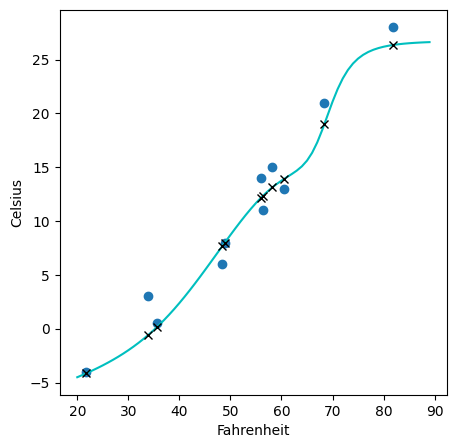

In [ ]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(figsize=(5, 5))
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

PyTorch has a whole submodule dedicated to neural networks called `torch.nn`. It contains:
- `nn.Module`: the base class representing a neural network
- `nn.Linear`: the class representing a linear transformation
- `nn.ReLU`: the class representing a ReLU activation function
- `nn.MSELoss`: the class representing an MSE loss function

PyTorch also offers several practival variants of the gradient descent method, as we have seen last week.

In [ ]:
class NeuralNet(nn.Module):

    def __init__(self): # the constructor of neural network
        super().__init__()

        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 5)
        self.linear3 = nn.Linear(5, 1)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.ReLU()

    def forward(self, x): # specify how the model turns inputs to outputs
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        y = self.linear3(x)
        return y

In [ ]:
model = NeuralNet()

In [ ]:
opt = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.MSELoss()

In [ ]:
def train_model(model, loss_func, opt, x_train, y_train, n_epochs):
    for epoch in range(n_epochs):

        predictions = model(x_train)
        loss = loss_func(predictions, y_train)
        opt.zero_grad()
        loss.backward()
        opt.step()

        if epoch == 0 or (epoch + 1) % 1000 == 0:
            print("Epoch:", epoch, "Loss:", loss.detach().numpy())

In [ ]:
train_model(model, loss_func, opt, t_un_train, t_c_train, 5000)

Epoch: 0 Loss: 237.74773
Epoch: 999 Loss: 2.874415
Epoch: 1999 Loss: 2.010684
Epoch: 2999 Loss: 1.829395
Epoch: 3999 Loss: 1.7194527
Epoch: 4999 Loss: 1.6524658


In [ ]:
print('predictions', model(t_un_val))
print('true target values:', t_c_val)

predictions tensor([[ 8.2468],
        [ 7.9464],
        [-0.7660]], grad_fn=<AddmmBackward0>)
true target values: tensor([[8.],
        [6.],
        [3.]])
